# Proyecto de Segmentación de Mercado para empresa Aliada

In [2]:
# importando librerias relevantes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/vorte/Downloads/')
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Cargando Dataframes, eliminando datos nulos y duplicados

producto = pd.read_csv('DIM_PRODUCT.csv').dropna()
producto = producto.drop_duplicates()

# Segundo dataframe
segmento = pd.read_csv('DIM_SEGMENT.csv').dropna()
segmento = segmento.drop_duplicates()

# Tercer dataframe
calendario = pd.read_csv('DIM_CALENDAR.csv').dropna()
calendario.drop_duplicates()

# cuarto dataframe
sales = pd.read_csv('FACT_SALES.csv').dropna()
sales = sales.drop_duplicates()

#### Limpieza y EDA del primer DF

In [5]:
# Observando el encabezado y la información que proporciona cada columna
producto.head()

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3
0,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
1,INDS. ALEN,CLORALEX,0000075000608,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
2,INDS. ALEN,CLORALEX,0000075000615,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
3,INDS. ALEN,CLORALEX,0000075000622,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
4,INDS. ALEN,CLORALEX,0000075000639,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO


In [6]:
# Tipos de Dtype:
producto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 504
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MANUFACTURER      497 non-null    object
 1   BRAND             497 non-null    object
 2   ITEM              497 non-null    object
 3   ITEM_DESCRIPTION  497 non-null    object
 4   CATEGORY          497 non-null    int64 
 5   FORMAT            497 non-null    object
 6   ATTR1             497 non-null    object
 7   ATTR2             497 non-null    object
 8   ATTR3             497 non-null    object
dtypes: int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
# Cantidad de marcas y marcas mas populares:
producto['BRAND'].value_counts()

BRAND
CLORALEX                     113
VANISH                       103
CLOROX                        92
OXI CLEAN                     31
BANDERA                       25
DR.BECKMANN                   22
OTHERS MARCA UNIF.            20
VANISH PODER 02               10
BLANCATEL                      9
CLORTEX                        8
LYSOL                          8
CLARASOL                       6
LOS PATITOS                    6
SHOUT                          5
VANISH CRYSTAL WHITE           4
TIDE                           4
IBERIA                         4
PATITO                         3
LA VALENCIANA                  3
CUELLOS PUNOS Y MANCHITAS      3
SANYTOL                        3
MARIPOSA                       2
CLORO 10                       2
HARPIC                         2
BCLORHADA                      2
CARISMA                        1
PURO SOL                       1
ARTIC WHITE                    1
CLORALUZ                       1
RADIANTE                       1
VANI

In [8]:
# Corroborando si hay mas categorias ademas de la 1:
producto[producto['CATEGORY'] != 1]

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3


In [9]:
# Buscando dentro de los atributos:
producto[producto['ATTR1'] != 'CLORO']

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3
10,RECKITT,LYSOL,0019200958714,LYSOL SANITIZANTE DE ROPA CRISP LINEN BOT 1.2 ...,1,LIQUIDO,SANITIZANTE,SANITIZANTE,SANITIZANTE
11,P&G,TIDE,0037000018704,9TIDE LIPIADOR DE ROPA QUITAMANCHAS PLUMON 10 ...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR
12,P&G,TIDE,0037000213215,9TIDE ADIVITO QUITAMANCHAS 220 GR 0037000213215,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,OTR. TIPOS
13,P&G,TIDE,0037000830870,9TIDE BOOST VIVID WHITE + BRIGHT BOL 18CAP = 4...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,OTR. TIPOS
14,P&G,TIDE,0037000889281,TIDE MULTI PURPOSE OXI STAIN REMOVER BOT 1.72K...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,OTR. TIPOS
...,...,...,...,...,...,...,...,...,...
493,RECKITT,VANISH,7891035040276,VANISH SUPER BARRA WHITE QUITA MANCHAS 68GR 78...,1,BARRA,SAFE BLEACH,FABRIC TREATMENT,BLANCO
496,IBERIA,IBERIA,8411660210012,IBERIA REVOLUTION QUITA MANCHAS DIARIAS ROLL O...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR
497,IBERIA,IBERIA,8411660210029,IBERIA REVOLUTION QUITA MANCHAS RESISTENTES BO...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR
498,IBERIA,IBERIA,8411660210036,IBERIA REVOLUTION QUITA MANCHAS ACCIDENTALES B...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR


In [10]:
# Tipos de Formato:
producto['FORMAT'].value_counts()

FORMAT
LIQUIDO    319
POLVO       94
GEL         72
BARRA       11
TOALLAS      1
Name: count, dtype: int64

In [11]:
# Conteo de atributos
producto['ATTR1'].value_counts()

ATTR1
CLORO          241
SAFE BLEACH    218
PRELAVADOR      27
SANITIZANTE     11
Name: count, dtype: int64

In [12]:
# Conteo de atributos
producto['ATTR2'].value_counts()

ATTR2
FABRIC TREATMENT    245
CLORO               241
SANITIZANTE          11
Name: count, dtype: int64

Tenemos un DataFrame con 9 columnas, mostrando 497 productos, de 32 marcas diferentes pero de la misma categoría, 5 formatos diferentes y con el tercer atributo no definido, en su mayoría.

Además es muy confuso como distribuye los atributos que parecen ser los mismos en dos diferentes columnas... parece que podemos quedarnos solo con el atributo 1 que cuenta con mas caracteristicas. Se prodecera a borrar las columnas inecesarias

In [14]:
producto.drop(columns = ['CATEGORY','ATTR2','ATTR3'], inplace= True)
producto.head()

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,FORMAT,ATTR1
0,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,LIQUIDO,CLORO
1,INDS. ALEN,CLORALEX,0000075000608,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...,LIQUIDO,CLORO
2,INDS. ALEN,CLORALEX,0000075000615,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,LIQUIDO,CLORO
3,INDS. ALEN,CLORALEX,0000075000622,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
4,INDS. ALEN,CLORALEX,0000075000639,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,LIQUIDO,CLORO


Limpieza y EDA del segundo DF

In [16]:
# Observando DF
sales.head()

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5


In [17]:
# Corroborando que ese codigo de ITEM tan extraño si exista en la lista de productos
producto[producto['ITEM']=='7501058792808BP2']	

# Sí existe, se dejara tal y como esta

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,FORMAT,ATTR1
312,RECKITT,VANISH,7501058792808BP2,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,POLVO,SAFE BLEACH


In [18]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   WEEK                         122002 non-null  object 
 1   ITEM_CODE                    122002 non-null  object 
 2   TOTAL_UNIT_SALES             122002 non-null  float64
 3   TOTAL_VALUE_SALES            122002 non-null  float64
 4   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64
 5   REGION                       122002 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.6+ MB


Este DF esta más completo ya que cuenta con 122002 observaciones de ventas. Parece ser nuestro DF principal.

Observamos que en lugar de la fecha nos muestra la semana en la que fue vendido cada producto. Lo cual asume un problema si no esta en el formato correcto.

Hasta ahora no parece que podamos borrar ninguna columna. Todas pueden resultar significativas.

Aunque si nuestro objetivo principal es predecir el valor total de ventas como variable depentiente Y. Bien puede borrarse la variable Region, al no ser relevante.

#### Limpieza y EDA del tercer DF

In [21]:
segmento.head()

,CATEGORY,ATTR1,ATTR2,ATTR3,FORMAT,SEGMENT
0,1,CLORO,CLORO,BAMBINO,LIQUIDO,BLEACH
1,1,CLORO,CLORO,GERMICIDA,LIQUIDO,BLEACH
2,1,CLORO,CLORO,MASCOTAS,LIQUIDO,BLEACH
3,1,CLORO,CLORO,MULTIUSOS,GEL,BLEACH
4,1,CLORO,CLORO,MULTIUSOS,LIQUIDO,BLEACH


Este DF no tiene mucho sentido, ayq eu aunque contiene la columna segmento, al no contener columna ITEM, no se puede relacionar, ademas de que tods siguen siendo categoria 1

#### Limpieza y EDA del cuarto DF

In [24]:
calendario.head()

,WEEK,YEAR,MONTH,WEEK_NUMBER,DATE
0,01-21,2021,1,1,2021-01-10
1,02-21,2021,1,2,2021-01-17
2,03-21,2021,1,3,2021-01-24
3,04-21,2021,1,4,2021-01-31
4,05-21,2021,2,5,2021-02-07


Este último DataFrame nos permitira hacer una prediccion del tipo serie de tiempo, pero clumnas como Month y Week_Numer son irrelevantes, solo necesitamos week, year y Date... Por otro lado no me parece haber visto el año 2021 en el DF de Ventas.. esta por corroborarse

In [26]:
calendario.drop(columns = ['MONTH','WEEK_NUMBER'], inplace = True)
calendario.head()

,WEEK,YEAR,DATE
0,01-21,2021,2021-01-10
1,02-21,2021,2021-01-17
2,03-21,2021,2021-01-24
3,04-21,2021,2021-01-31
4,05-21,2021,2021-02-07


In [27]:
calendario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   WEEK    156 non-null    object
 1   YEAR    156 non-null    int64 
 2   DATE    156 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


Contiene 156 semanas osea, 3 años... pero no se sabe si coincide con el de ventas

In [29]:
#### Concatenando Frames para tener uno listo para el clustering:

In [30]:
# Cambiando el nombre de la columna ITEM_Code en el DF sales para que funcione la concatenacion
sales.rename(columns = {'ITEM_CODE':'ITEM'}, inplace = True)
print(sales.columns)
print(producto.columns)

Index(['WEEK', 'ITEM', 'TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES',
       'TOTAL_UNIT_AVG_WEEKLY_SALES', 'REGION'],
      dtype='object')
Index(['MANUFACTURER', 'BRAND', 'ITEM', 'ITEM_DESCRIPTION', 'FORMAT', 'ATTR1'], dtype='object')


In [31]:
df = pd.merge(sales, producto, on = 'ITEM', how = 'inner')
df.head

<bound method NDFrame.head of          WEEK              ITEM  TOTAL_UNIT_SALES  TOTAL_VALUE_SALES  \
0       34-22  7501058792808BP2             0.006              0.139   
1       34-22     7501058715883             0.487            116.519   
2       34-22     7702626213774             1.391             68.453   
3       34-22     7501058716422             0.022              1.481   
4       34-22     7501058784353             2.037            182.839   
...       ...               ...               ...                ...   
121997  26-23  7501058792778BP1             1.192            150.829   
121998  26-23     7501058757630             1.947            235.416   
121999  26-23     7501058753441            18.013            429.289   
122000  26-23  7702626204208BP1            21.152            210.276   
122001  26-23     7501058784346             1.468            301.973   

        TOTAL_UNIT_AVG_WEEKLY_SALES                       REGION MANUFACTURER  \
0                       

In [32]:
# Concatenando con Calendario tambien:

df_completo = pd.merge(calendario, df, on = 'WEEK', how = 'inner')
df_completo.head()

,WEEK,YEAR,DATE,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1
0,01-22,2022,2022-01-09,7501268200001,0.003,0.027,3.000,TOTAL AUTOS AREA 1,BLANQUEADORA MEXICANA,LA VALENCIANA,LA VALENCIANA BOT.PLAST. 1000ML NAL. 750126820...,LIQUIDO,CLORO
1,01-22,2022,2022-01-09,7501268200049,0.006,0.112,2.000,TOTAL AUTOS AREA 1,BLANQUEADORA MEXICANA,LOS PATITOS,LOS PATITOS BLANQUEADOR REGULAR BOT PLAST 2 LT...,LIQUIDO,CLORO
2,01-22,2022,2022-01-09,7501268200070,0.044,1.478,6.286,TOTAL AUTOS AREA 1,BLANQUEADORA MEXICANA,LOS PATITOS,LOS PATITOS BOT.PLAST. 4000 MLNAL. 7501268200070,LIQUIDO,CLORO
3,01-22,2022,2022-01-09,0757037517123,0.639,52.873,3.920,TOTAL AUTOS AREA 1,CHURCH & DWIGHT,OXI CLEAN,OXI CLEAN LIQ.BOT. 635 ML 0757037517123,LIQUIDO,PRELAVADOR
4,01-22,2022,2022-01-09,7501080954786,1.306,23.738,5.464,TOTAL AUTOS AREA 1,CHURCH & DWIGHT,OXI CLEAN,OXI CLEAN ULTRA QUITAMANCHAS GEL BOL 200ML 750...,GEL,SAFE BLEACH


In [33]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   WEEK                         122002 non-null  object 
 1   YEAR                         122002 non-null  int64  
 2   DATE                         122002 non-null  object 
 3   ITEM                         122002 non-null  object 
 4   TOTAL_UNIT_SALES             122002 non-null  float64
 5   TOTAL_VALUE_SALES            122002 non-null  float64
 6   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64
 7   REGION                       122002 non-null  object 
 8   MANUFACTURER                 122002 non-null  object 
 9   BRAND                        122002 non-null  object 
 10  ITEM_DESCRIPTION             122002 non-null  object 
 11  FORMAT                       122002 non-null  object 
 12  ATTR1                        122002 non-null  object 
dtyp

In [34]:
df_completo.describe()

,YEAR,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES
count,122002.000000,122002.000000,122002.000000,122002.000000
mean,2022.334396,3.211097,90.513761,10.099904
std,0.471781,14.496009,350.236505,22.650142
min,2022.000000,0.000000,0.001000,0.042000
25%,2022.000000,0.063000,2.662000,2.316000
50%,2022.000000,0.367000,16.812000,3.993500
75%,2023.000000,1.520000,62.961500,8.898000
max,2023.000000,504.681000,12236.759000,794.000000


Se observa ya con nuestro nuevo DF completo que se ha eliminado el año 2021, solo hay ventas registradas en el 2022 y 2023. una media de 90.5 K que ya nos ayudara con nuestras predicciones una desviacion estandar de 350.2 lo cual es demasiado para una desviacion estnadar, mas alta que la media.. nos habla de datos muy moviles.

#### Obteniendo insighs significativos de nuestro DEA

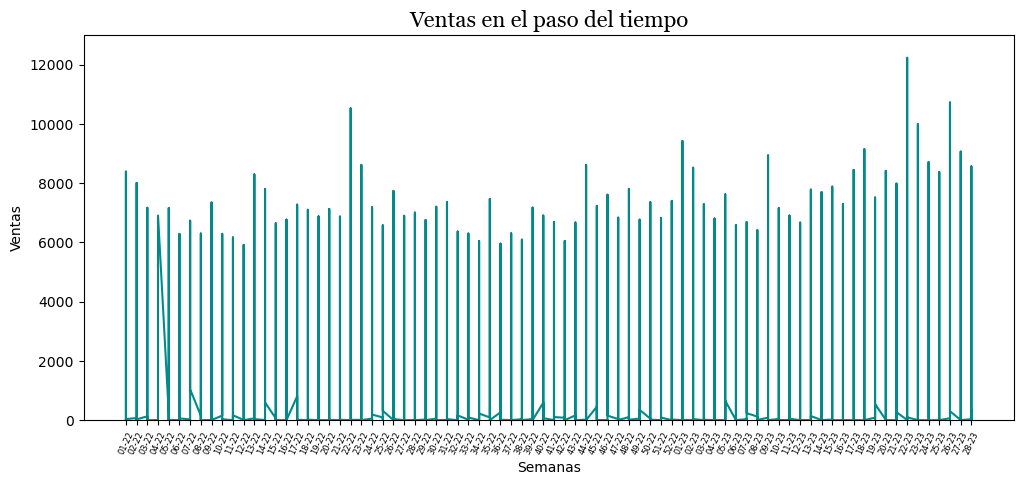

In [37]:
# Graficando las ventas a traves del tiempo
plt.figure(figsize = (12,5))
plt.plot(df_completo['WEEK'], df_completo['TOTAL_VALUE_SALES'], color = 'darkcyan')
plt.xlabel('Semanas')
plt.ylabel('Ventas')  
plt.xticks(fontsize = 6, rotation = 65)
           
#cambiando los limites de los ejes para una mejor visualizacion:
plt.ylim(0,13000)
plt.title('Ventas en el paso del tiempo', fontname = 'Georgia', fontsize = 16)

#mostrando:
plt.show()

Parece que tenemos una distribución que no sigue tendencias.. bien podría calificar para un modelo de predicción ARIMA

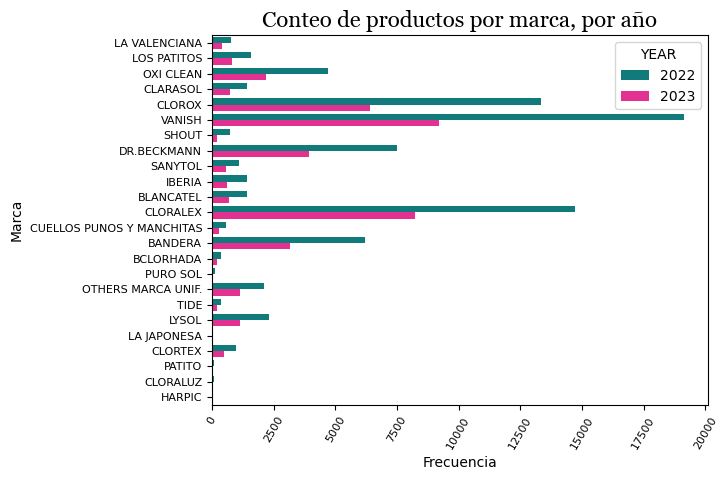

In [40]:
#Haremos un conteo de la cantidad de productos que hay para cada marca.
fig, ax = plt.subplots()

# Creando grafico de conteo, que incluya los dos diferentes años.
import seaborn as sns

sns.countplot(data = df_completo, y = 'BRAND', hue ='YEAR', palette = ['darkcyan','deeppink'])
plt.title('Conteo de productos por marca, por año',fontname = 'Georgia', fontsize = 16)
plt.xlabel('Frecuencia') 
plt.ylabel('Marca')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8, rotation=60)

plt.show()

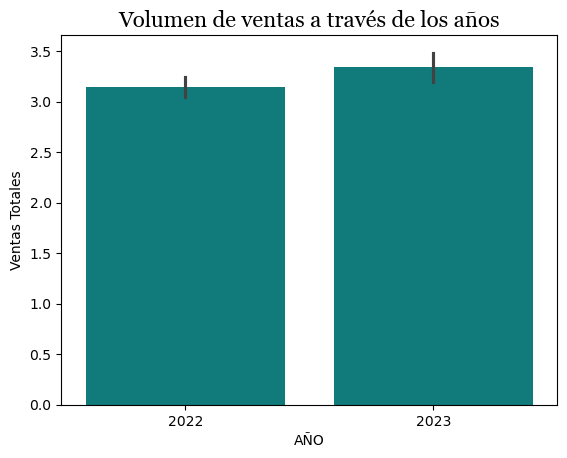

In [60]:
# Creando un grafico de barras que muestre la relacion ventas/años 
sns.barplot(data = df_completo, x = 'YEAR', y= 'TOTAL_UNIT_SALES', color = 'darkcyan').set(xlabel = 'AÑO', ylabel = 'Ventas Totales')
plt.title('Volumen de ventas a través de los años',fontname = 'Georgia', fontsize = 16)
plt.show()

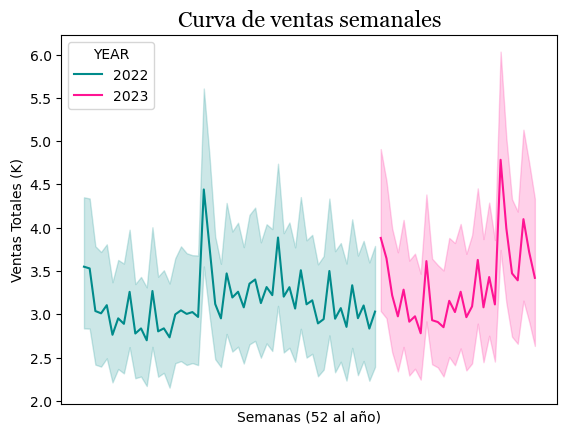

In [62]:
# Grafico de linea a traves del tiempo, esta vez dividido en años.
fig, ax = plt.subplots()   #Hemos añadio a subplots de matplotlib para este grafico para poder quitar los ticks encimados del eje x

# Creando grafico de lineas (se aprecia mejor que el de barras),que incluya los dos diferentes años.
sns.lineplot(data = df_completo, x = 'WEEK', y= 'TOTAL_UNIT_SALES', hue = 'YEAR', 
             palette = ['darkcyan','deeppink']).set(xlabel = 'Semanas (52 al año)',ylabel = 'Ventas Totales (K)')

ax.xaxis.set_ticks([])     #quitando ticks del eje x
plt.title('Curva de ventas semanales',fontname = 'Georgia', fontsize = 16)
plt.show()

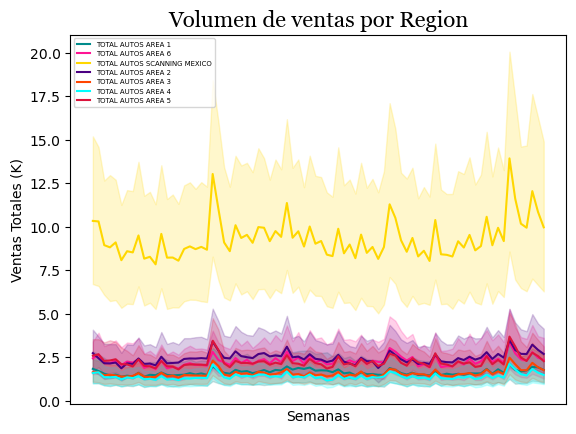

In [64]:
# Grafico de ventas a traves del tiempo, por region:
fig, ax = plt.subplots()   #He añadido a subplots de matplotlib para poder quitar los ticks encimados del eje x

# Creando grafico de lineas (se aprecia mejor que el de barras),que incluya los dos diferentes años.
sns.lineplot(data = df_completo, x = 'WEEK', y= 'TOTAL_UNIT_SALES', hue = 'REGION',
            palette = ['darkcyan','deeppink','gold','indigo','orangered','cyan','crimson']).set(xlabel = 'Semanas', ylabel = 'Ventas Totales (K)')

plt.title('Volumen de ventas por Region',fontname = 'Georgia', fontsize = 16)
plt.legend(fontsize=5, loc = 'upper left')     # cambiando el tamaño de la leyenda pues cubria todo el grafico
ax.xaxis.set_ticks([])     #quitando ticks del eje x
plt.show()

Es impresionante ver que aunque las regiones venden más o menos, efectivamente siguen los mismos patrones de ventas, 
sin embargo para apreciar mejor, cual vende más hare un grafico de barras

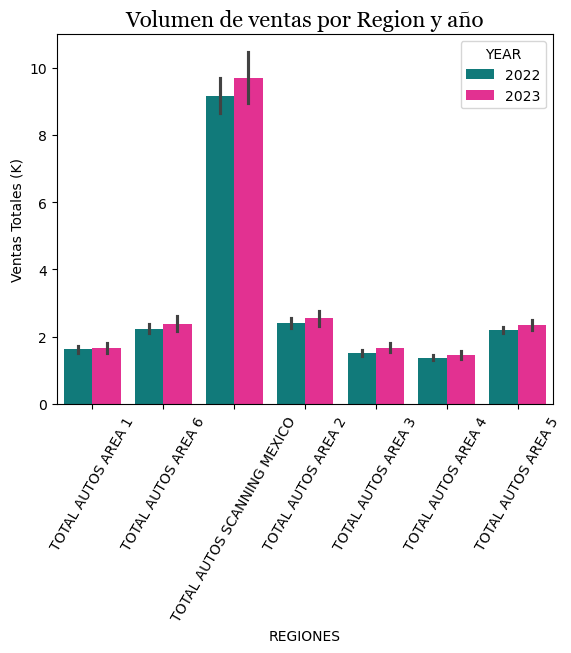

In [67]:
fig, ax = plt.subplots()  

# Creando grafico de lineas (se aprecia mejor que el de barras),que incluya los dos diferentes años.
sns.barplot(data = df_completo, x = 'REGION', y= 'TOTAL_UNIT_SALES', hue = 'YEAR', 
            palette = ['darkcyan','deeppink']).set(xlabel = 'REGIONES', ylabel = 'Ventas Totales (K)')
ax.tick_params(axis='x', rotation=60) 
plt.title('Volumen de ventas por Region y año',fontname = 'Georgia', fontsize = 16)

plt.show()

Efectivamente el area de AUTOS SCANNING MEXICO ha sido por gran diferencia el area que más ventas tiene,
superando con el triple o más a las otras areas

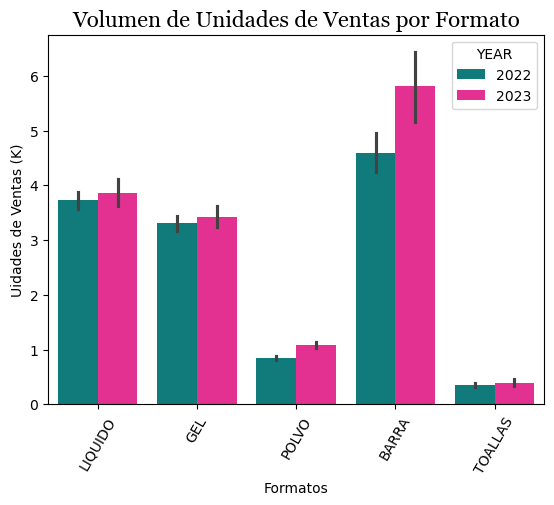

In [73]:
# Grafico de Unidades de Venta de acuerdo al formato en los diferentes años
fig, ax = plt.subplots()

sns.barplot(data = df_completo, x = 'FORMAT', y= 'TOTAL_UNIT_SALES', hue = 'YEAR',
            palette = ['darkcyan','deeppink']).set(xlabel = 'Formatos',ylabel = 'Uidades de Ventas (K)')
plt.title('Volumen de Unidades de Ventas por Formato',fontname = 'Georgia', fontsize = 16)
ax.tick_params(axis='x', rotation=60) 

plt.show()

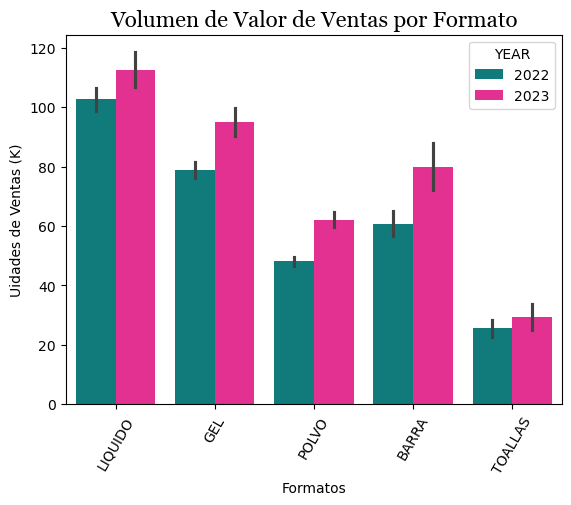

In [75]:
# Grafico de Valor total de Ventas de acuerdo al formato en los diferentes años para notar si hay coherencia.
fig, ax = plt.subplots()

sns.barplot(data = df_completo, x = 'FORMAT', y= 'TOTAL_VALUE_SALES', hue = 'YEAR',
            palette = ['darkcyan','deeppink']).set(xlabel = 'Formatos',ylabel = 'Uidades de Ventas (K)')
plt.title('Volumen de Valor de Ventas por Formato',fontname = 'Georgia', fontsize = 16)
ax.tick_params(axis='x', rotation=60) 

plt.show()

Así como hemos tenido una rea ganadora con gran diferencia, 
igualmente en cuanto al formato de productos, 'BARRA' es con diferencia significativa el formato más vendido

## Insighs del DEA:

1. La mejor semana de ventas fue la semana 22 del año 2023
2. La Frecuencia con la que se venden más de 100 K productos (del mismo producto) semanalmente es casi nula.
3. Parece que la marca vanish fue la que más productos tuvo en el mercado, sobre todo en el año 2022. reduciendo considerablemente para el siguiente año.
4. El 2023 fue un mejor año para las ventas de Cloro. Probablemente se deba a estrategías de venta o simplemente a alguna razon en el contexto social.
5. Es muy importante notar que el 2023 esta por encima de las ventas pero aunque siguen un patron de ventas parecido, sin embargo no existe registro a mitad del año aproximadamente.
6. Es impresionante ver que regiones venden más o menos, y notar como efectivamente siguen los mismos patrones de ventas, sin embargo al apreciarlo mejor en el grafico de barras el area de AUTOS SCANNING MEXICO ha sido por gran diferencia el area que más ventas tiene, superando con el triple o más a las otras areas.
7. Así como hemos tenido una área ganadora con gran diferencia, igualmente en cuanto al formato de productos, 'BARRA' es con diferencia significativa el formato más vendido. Sin embargo, no es el que más valor deja.. el formato Líquido deja más valor rebazando a los mas vendidos.
8. Aunque las ventas fluctuan de acuerdo a los diferentes formatos de productos, casi nadie elige comprar el formato de cloro en toallas limpiadoras.
10. Como podemos observar, al dividir las ventas semanales en las diferentes regiones, tomando en cuenta la variable año, aunque todas las regiones seguían el mismo patron, las areas 3, 4 y 5 sí lograron superar sus ventas para el año 2023.

## Algoritmo de Clasificación K-Means:

In [77]:
# Probablemente los datos coincidan con el segmento actual.
segmento['SEGMENT'].value_counts()

SEGMENT
LIQUID & GEL    16
BLEACH          13
POWDER          10
PRETREAT         7
BAR              4
OTHERS           1
SANITIZER        1
Name: count, dtype: int64

Contiene 7 diferentes segmentaciones.. al no tener forma de unirse a la tabla ya que todos son caterogia 1 y no contamos con el # de ITEM en la tabla Segmento, no será posible corroborar si el algoritmo KMEANS lo ha hecho bien, pero quiza si podra determinar el nuemro de clusters y ver si coinciden

Como este clustering sera realizado con base en ventas, y no con base en atributos, los grupos y centroides nos regalaran a los productos más o menos vendidos muy probablemente. Podría más adelante realizarse otro clustering basado en el formato o los atributos, pero parece no tener relevancia en este momento ya que ya estan segmentados de esa forma.

Como tampoco se requiere que se agrupe por region y muy probablemente esto afectaría, debido a que hay regiones con mas ventas que otras; se procedera a agrupar el DataFrame por producto (ITEM) antes de realizar el Clustering, además esto ayudara a recudir el tamaño del Data Set agilizando los procesos. 

In [80]:
df_agrupado = df_completo.groupby(['DATE','ITEM','MANUFACTURER','BRAND','ITEM_DESCRIPTION','FORMAT','ATTR1' ],as_index = False)[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES','TOTAL_UNIT_AVG_WEEKLY_SALES']].sum().reset_index()
df_agrupado.head()

,index,DATE,ITEM,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES
0,0,2022-01-09,0000075000592,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,LIQUIDO,CLORO,0.870,3.915,73.421
1,1,2022-01-09,0000075000608,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...,LIQUIDO,CLORO,24.798,212.649,160.944
2,2,2022-01-09,0000075000615,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,LIQUIDO,CLORO,551.083,7590.783,618.631
3,3,2022-01-09,0000075000622,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO,742.076,16787.194,958.012
4,4,2022-01-09,0000075000639,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,LIQUIDO,CLORO,366.658,14780.415,442.036


In [124]:
from sklearn.cluster import KMeans

# Seleccion de las columnas numericas:
campos = df_agrupado.select_dtypes(include = 'number')
campos.drop(columns = ['index'], inplace = True)
campos.head()

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES
0,0.870,3.915,73.421
1,24.798,212.649,160.944
2,551.083,7590.783,618.631
3,742.076,16787.194,958.012
4,366.658,14780.415,442.036


In [126]:
# Calculando la inercia de los centroides mediante un ciclo for:

inercia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(campos)
    inercia.append(kmeans.inertia_)

inercia

[48057688774.89149,
 12512206044.218937,
 7014960177.046153,
 3791528118.966854,
 2409417483.335929,
 1876674623.9483051,
 1322293524.3038607,
 1107984741.3719282,
 967548656.7266315,
 834579363.0484545]

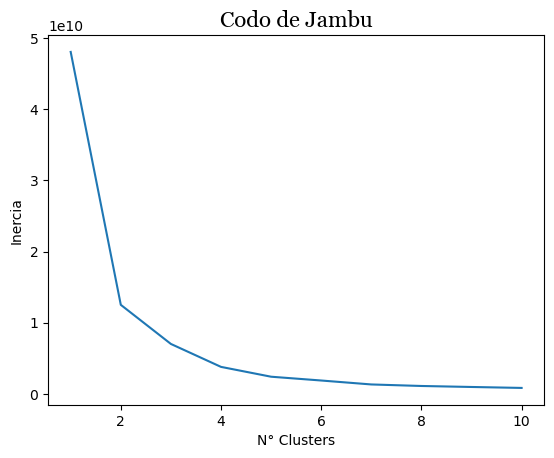

In [127]:
# Graficando el codo de Jambu:
plt.plot(range(1,11), inercia)
plt.title('Codo de Jambu', fontname = 'Georgia', fontsize = 16)
plt.xlabel('N° Clusters')
plt.ylabel('Inercia')
plt.show()

Tenemos un Codo de Jambu bastante curbo, en donde pueden ser dos o hasta 4 la cantidad de grupos optimos.

Por simple intuición podria basarme en el lugar en donde más parece doblarse el codo, es decir 2 clusters. Sin embargo, se realizara la prueba de Criterio de silueta para elegir el numero más optimo

In [129]:
from sklearn.metrics import silhouette_score

for x in range(2,6):
    kmeans = KMeans(n_clusters = x, random_state= 42)
    kmeans.fit_predict(campos)
    silueta = silhouette_score(campos, kmeans.labels_, metric= 'euclidean')
    print('Score Silhouette, K =', x, ':', silueta)

Score Silhouette, K = 2 : 0.9414546539235359
Score Silhouette, K = 3 : 0.7761287120506439
Score Silhouette, K = 4 : 0.7645401555687817
Score Silhouette, K = 5 : 0.7240159128900839


Fue muy positivo revisar el criterio de silueta, ya que podriamos haber mal interpretado el como a 3 clusters, cuando en realidad dos clusters mide mejor las distancias entre los puntos y los centroides

### Aplicación del Algoritmo K means con el numero de clusters óptimo

In [150]:
kmeans = KMeans(n_clusters = 2 , random_state = 42)
kmeans.fit(campos)

KMeans(n_clusters=2, random_state=42)

In [152]:
### Obtención de predicciones de clusters:

cluster_values = kmeans.fit_predict(campos)
cluster_values

array([1, 1, 0, ..., 1, 1, 1])

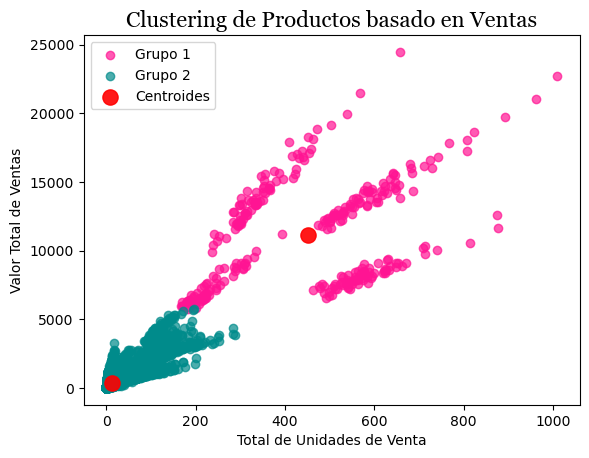

In [134]:
# Vamos a tomar solo 2 variables esta vez, solo para ver la ubicación de los grupos: el valor total de ventas y el total de unidades.

campos_array = campos.values

plt.scatter(campos_array[cluster_values == 0,0], campos_array[cluster_values == 0,1], label = 'Grupo 1', color = 'deeppink',alpha=0.7)
plt.scatter(campos_array[cluster_values == 1,0], campos_array[cluster_values == 1,1], label = 'Grupo 2', color = 'darkcyan',alpha=0.7)
plt.title('Clustering de Productos basado en Ventas', fontname = 'Georgia', fontsize = 16)
plt.xlabel('Total de Unidades de Venta')
plt.ylabel('Valor Total de Ventas')

# calculando centroides:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'r', s = 120, alpha = 0.9, label='Centroides')
plt.legend()
plt.show()

Curioso como en el grafico bien podriamos tener 5 diferentes clusters..  Aunque el codo de Jambu no lo muestre ni tampoco el criterio de silueta. 
Cabe recordar tambien que estos datos estan siendo visualizaos en 2D

In [136]:
# Creacion de un algoritmo con 5 clusters
kmeans = KMeans(n_clusters = 5 , random_state = 42)
kmeans.fit(campos)

cluster_values = kmeans.fit_predict(campos)
cluster_values

array([1, 1, 2, ..., 1, 1, 1])

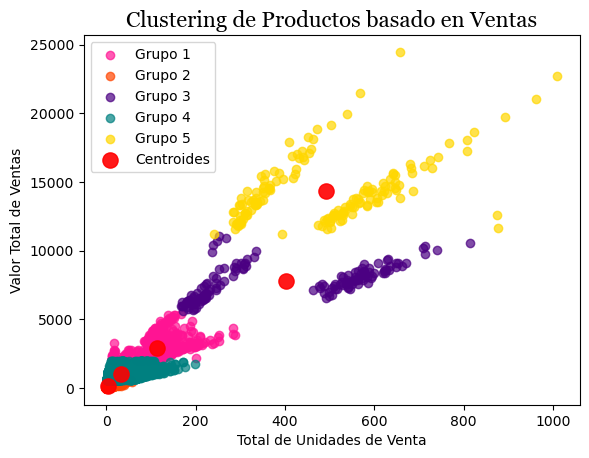

In [137]:
campos_array = campos.values

plt.scatter(campos_array[cluster_values == 0,0], campos_array[cluster_values == 0,1], label = 'Grupo 1', color = 'deeppink',alpha=0.7)
plt.scatter(campos_array[cluster_values == 1,0], campos_array[cluster_values == 1,1], label = 'Grupo 2', color = 'orangered',alpha=0.7)
plt.scatter(campos_array[cluster_values == 2,0], campos_array[cluster_values == 2,1], label = 'Grupo 3', color = 'indigo',alpha=0.7)
plt.scatter(campos_array[cluster_values == 3,0], campos_array[cluster_values == 3,1], label = 'Grupo 4', color = 'teal',alpha=0.7)
plt.scatter(campos_array[cluster_values == 4,0], campos_array[cluster_values == 4,1], label = 'Grupo 5', color = 'gold',alpha=0.7)
plt.title('Clustering de Productos basado en Ventas', fontname = 'Georgia', fontsize = 16)
plt.xlabel('Total de Unidades de Venta')
plt.ylabel('Valor Total de Ventas')

# calculando centroides:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'r', s = 120, alpha = 0.9, label='Centroides')
plt.legend()
plt.show()

Ok el grafico demuestra que la distribución de los centroides esta bien con solo dos centroides.. ya wue estos no parecen acomodarse como nuestra vista lo predice.. una vez mas.. debemos considerar que los datos son vistos en 2D y solo hemos considerados dos variables.

Por otro lado, tomando en cuenta la forma del Scatter y sus ejes X y Y, los clusters estan definitivamente sesgados por las unidades de ventas y el valor total que por supuesto tienen una correlación positiva en ascendente.

Dependera de nosotros que tanto queramos segmentar los productos, pero dos clusters parecen ser los indicados.

## Definiendo grupos y analizando resultados.
Qué nombre le pondriamos a los grupos si tuvieramos que hacerlo? Probablemente, productos ganadores serian aquellos que logran venderse bien, y productos en proceso de mejora, aquellos cuyas unidades de ventas parecen no ascender. 

En el caso del segundo clustering, podría tomarse al grupo 5 como realmente los productos de los cuales podriamos aprender para desarrollar mejor a aquellos cuya venta es deficiente.

In [154]:
# Añadiendo los datos al data frame para encontrar patrones entre los grupos:

df_agrupado['CLUSTER'] = cluster_values           # se tomaron en cuenta las primeras predicciones donde solo hay 2 grupos.
df_agrupado.head()

,index,DATE,ITEM,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,CLUSTER
0,0,2022-01-09,0000075000592,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,LIQUIDO,CLORO,0.870,3.915,73.421,1
1,1,2022-01-09,0000075000608,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...,LIQUIDO,CLORO,24.798,212.649,160.944,1
2,2,2022-01-09,0000075000615,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,LIQUIDO,CLORO,551.083,7590.783,618.631,0
3,3,2022-01-09,0000075000622,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO,742.076,16787.194,958.012,0
4,4,2022-01-09,0000075000639,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,LIQUIDO,CLORO,366.658,14780.415,442.036,0


In [156]:
#observando data del grupo 1 de productos con áreas de oportunidad
df_grupo1 = df_agrupado[df_agrupado['CLUSTER']== 0]
df_grupo1

,index,DATE,ITEM,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,CLUSTER
2,2,2022-01-09,0000075000615,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,LIQUIDO,CLORO,551.083,7590.783,618.631,0
3,3,2022-01-09,0000075000622,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO,742.076,16787.194,958.012,0
4,4,2022-01-09,0000075000639,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,LIQUIDO,CLORO,366.658,14780.415,442.036,0
69,69,2022-01-09,7501025402051,INDS. ALEN,BLANCATEL,BLANCATEL CONCENTRADO BOT PLAST 3750ML NAL 750...,LIQUIDO,CLORO,222.462,6787.106,382.981,0
276,276,2022-01-16,0000075000615,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,LIQUIDO,CLORO,586.730,7663.573,664.752,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20655,20655,2023-07-10,7501071900143,CLOROX,CLOROX,CLOROX REGULAR CONCENTRADO BOTPLAST.3800ML 750...,LIQUIDO,CLORO,238.557,8179.830,296.643,0
20745,20745,2023-07-17,0000075000615,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,LIQUIDO,CLORO,563.078,8521.956,628.294,0
20746,20746,2023-07-17,0000075000622,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO,710.496,16130.164,909.627,0
20747,20747,2023-07-17,0000075000639,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,LIQUIDO,CLORO,453.438,17138.118,528.110,0


In [157]:
#observando data del grupo 2 de productos ganadores
df_grupo2 = df_agrupado[df_agrupado['CLUSTER']== 1]
df_grupo2

,index,DATE,ITEM,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,CLUSTER
0,0,2022-01-09,0000075000592,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,LIQUIDO,CLORO,0.870,3.915,73.421,1
1,1,2022-01-09,0000075000608,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...,LIQUIDO,CLORO,24.798,212.649,160.944,1
5,5,2022-01-09,0037000018704,P&G,TIDE,9TIDE LIPIADOR DE ROPA QUITAMANCHAS PLUMON 10 ...,LIQUIDO,SAFE BLEACH,0.444,42.870,16.950,1
6,6,2022-01-09,0046500022517,SC JOHNSON,SHOUT,SHOUT TRIPLE ACCION LAUNDRY STAIN REMOVER BOT ...,LIQUIDO,SAFE BLEACH,0.042,3.194,12.125,1
7,7,2022-01-09,0046500022692,SC JOHNSON,SHOUT,SHOUT ADVANCED LAUNDRY STAIN REMOVER ULTRA CON...,GEL,SAFE BLEACH,0.466,40.493,16.917,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20985,20985,2023-07-17,7702626213781,RECKITT,VANISH,VANISH OXI ACTION CRISTAL WHITE DOYPACK 240 GR...,POLVO,SAFE BLEACH,13.721,795.190,28.339,1
20986,20986,2023-07-17,7891035040276,RECKITT,VANISH,VANISH SUPER BARRA WHITE QUITA MANCHAS 68GR 78...,BARRA,SAFE BLEACH,102.070,1432.467,133.375,1
20987,20987,2023-07-17,8410907050053,IBERIA,IBERIA,IBERIA BLANCO NUCLEAR BLANQUEADOR REG CAJA 6SO...,POLVO,CLORO,0.732,51.994,22.898,1
20988,20988,2023-07-17,8411660210029,IBERIA,IBERIA,IBERIA REVOLUTION QUITA MANCHAS RESISTENTES BO...,LIQUIDO,SAFE BLEACH,0.454,30.120,16.789,1


#### Primeros insighs:
El grupo 2 es el que posee mayor cantidad de unidades de ventas e ingresos

El grupo 1 es el que bien podría tener areas de oportunidad.

##### (Se realizara un analisis más exahustivo)

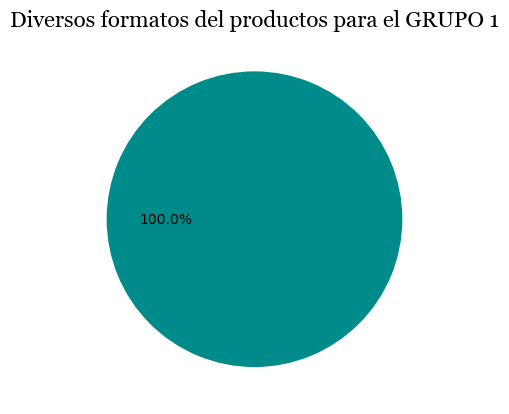

In [159]:
# Observando si hay diversos formatos en el grupo 1
plt.pie(df_grupo1['FORMAT'].value_counts(), colors = ['darkcyan', 'deeppink'],labels = df_grupo2['FORMAT'].value_counts().index, autopct = '%1.1f%%' )
plt.title('Diversos formatos del productos para el GRUPO 1', fontname = 'Georgia', fontsize = 16)
plt.show()

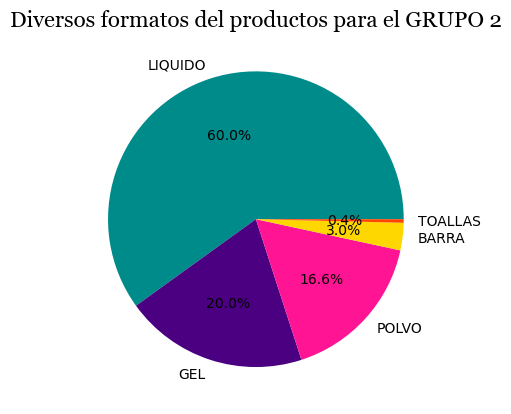

In [165]:
# Observando si hay diversos formatos en el grupo 2

plt.pie(df_grupo2['FORMAT'].value_counts(), colors = ['darkcyan','indigo', 'deeppink', 'gold','orangered'], 
        labels = df_grupo2['FORMAT'].value_counts().index, autopct = '%1.1f%%' )
plt.title('Diversos formatos del productos para el GRUPO 2', fontname = 'Georgia', fontsize = 16)
plt.show()

[]

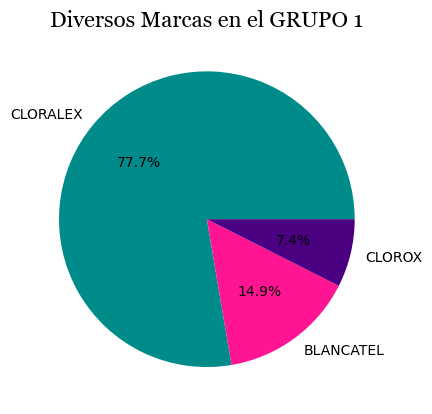

In [167]:
# Observando si hay diversos formatos en el grupo 2 con productos ganadores

plt.pie(df_grupo1['BRAND'].value_counts(), colors = ['darkcyan','deeppink', 'indigo', 'gold','orangered'], 
        labels = df_grupo1['BRAND'].value_counts().index, autopct = '%1.1f%%' )
plt.title('Diversos Marcas en el GRUPO 1', fontname = 'Georgia', fontsize = 16)
plt.plot()

[]

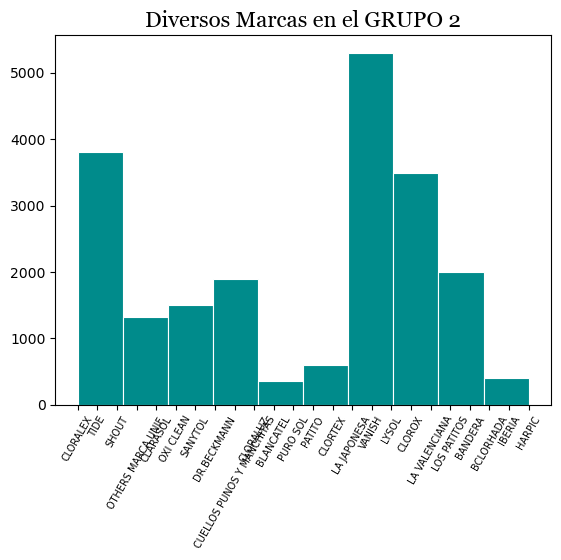

In [168]:
# Como son demasiadas marcas, vamos a usar un gráfico de distribucion
plt.hist(df_grupo2['BRAND'],color = 'darkcyan', edgecolor = 'white', linewidth = 0.8)
plt.xticks(fontsize = 7, rotation = 60)
# plt.tick_params()
plt.title('Diversos Marcas en el GRUPO 2', fontname = 'Georgia', fontsize = 16)
plt.plot()

#### Más insights:
1. Observamos que dentro del grupo 1 solamente hay un formato de producto y este es líquido. Sorpresa! a pesar de que ya se había notado que el Formato Barra es el más vendido, ahora se sabe que existen probablemente demasiados productos en formato líquido y algunos podrian no tener suficiente razn de ser.
2. Adicional dentro de este grupo solamente han entrado 3 diferentes marcas. Las 3 de Cloro. Otra vez podrá representar un exceso de productos.
3. Curioso de Cloralex aún siendo una marca tan buena segun los analisis, tiene tantos productos que aparecen en ambos grupos.
4. Ya en el segundo tipo de gráfico donde se analizan las marcas y no solo el formato, observamos que son las marcas 'La japonesa', 'Vanish' y, 'Lysol' las que de tener 3 clusters seguro estarían de segundo lugar en ventas, son por así decirlo, las que van a la cabeza.
5. "Blancatel","Cloraluz","Puro sol","Iberia" y, "Harpic", son las marcas menos exitosas dentro del grupo 2 segun estos datos.
6. Habra que notar la descripción de los productos en donde parece, además que los más vendidos, son aquellos productos de tamaños más grandes, de presentaciones de 950 ml o 2 L.